<a href="https://colab.research.google.com/github/matheusrb/Churn_Prediction/blob/master/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install imblearn

In [46]:
!pip install scikit-plot -q

# Declaração de Funções
No intuito de tornar o código mais legível, e de se otimizar o desenvovlimento, foram criadas funções que são usadas de maneira recorrente na resolução de problemas em DS

## Outlier Filter
Based on the interquartile range multiplied by a factor (which provides a margin to the upper and lower bounds), an acceptable range of values for a given variable is defined. The method implemented below was developed by `John Tukey` _(John Tukey, Exploratory Data Analysis, Addison-Wesley, 1977, pp. 43-44)_ and is called _`Tukey Fences`_, as it uses upper and lower bounds as limiters.

Generally, Tukey recommends a factor of 1.5 for the removal of outliers and 3.0 to filter out values completely outside the acceptable range.

An objective explanation about the method and outliers can be found [at this link from the IBM community](https://community.ibm.com/community/user/ai-datascience/blogs/moloy-de1/2021/03/23/points-to-ponder).

-------------------------------------------------------------

## Filtro de Outliers
Baseado no intervalo interquartil multiplicado de um factor (que fornece uma folga aos limites superior e inferior) é definido um range aceitavel de valores para uma determinada variável. O método implementado abaixo foi desenvolvido por `John Tukey` _(John Tukey, Exploratory Data Analysis, Addison-Wesley, 1977, pp. 43-44 )_ e é chamado de _`Tukey Fences`_, por usar limites superior e inferior como limitadores.

De maneira geral, Tukey recomenda um factor de 1.5 para remoção de outliers e 3.0 para filtrar valroes completamente fora do range aceitável.

Uma explicação objetiva sobre o método e sobre outliers pode ser encontrada [neste link da comunidade IBM](https://community.ibm.com/community/user/ai-datascience/blogs/moloy-de1/2021/03/23/points-to-ponder).

In [4]:
def outlierRemover(df, column, factor):
    """
    Based on the interquartile range multiplied by a factor (which provides a margin to the upper and lower bounds),
    an acceptable range of values for a given variable is defined. The method implemented below was developed by
    `John Tukey` _(John Tukey, Exploratory Data Analysis, Addison-Wesley, 1977, pp. 43-44)_ and is called _`Tukey Fences`_,
    as it uses upper and lower bounds as limiters.

    Generally, Tukey recommends a factor of 1.5 for the removal of outliers and 3.0 to filter out values completely outside
    the acceptable range.

    An objective explanation about the method and outliers can be found [at this link from the IBM community](https://community.ibm.com/community/user/ai-datascience/blogs/moloy-de1/2021/03/23/points-to-ponder).

    Parameters:
    df (pandas.DataFrame): DataFrame to remove outliers from.
    column (str): Column to remove outliers from.
    factor (float): Tukey's factor for defining outliers.

    Returns:
    pandas.DataFrame: DataFrame with the filtered values.
    """
    q3, q1 = np.percentile(df[column], [75, 25])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * factor)
    upper_bound = q3 + (iqr * factor)

    df_filtered = df.loc[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_filtered

## Percentage of Null Values by Variable
Returns the percentage of invalid values in a given column.

-----

## Percentual de valores nulos por variável
Retorna o percentual de valores inválidos de uma determianda coluna

In [5]:
def null_percentage(df, column_name):

    '''
    Calculate the percentage of null values in a given column of a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame to check.
    column_name (str): The name of the column to check for null values.

    Returns:
    float: The percentage of null values in the column.
    '''
    total_rows = df.shape[0]
    percentage = df[column_name].isnull().sum()/total_rows*100
    print("'%' de nulos {}: {:.2f}%".format(column_name, percentage))
    return {column_name : percentage}

## Variable Mapping
Maps some information about the variables such as data type, max, min, if it's cathegorical or not, binary or not and the percentage of null values

---

Mapeia algumas informações das variaveis como maximo, minimo, data type, se é categórica, se é binária e o perceentual de valores nulos

In [6]:
def Map_Var_DF (features, df):
  #Criando um dicionário para receber as variáveis
  dict_var = {"feature": [],
              "Tipo": [],
              "Categórico": [],
              "Binário": [],
              "Valores Categóricos": [],
              "Min": [],
              "Max": [],
              "Percentual de Nulos": [],
              "Média" : [],
              "STD" : [],
              "25%" : [],
              "50%" : [],
              "75%" : []}

  #Create a loop based on the features / Criando um loop a partir das features
  for feature in features:

    #Store the feature name / Armazenando o nome da feature
    dict_var['feature'].append(feature)

    #Store datatype / Armazenando o tipo da variável
    dict_var['Tipo'].append(df[feature].dtypes)

    #Store minimum value / Armazenando os valores mínimos
    dict_var['Min'].append(df[feature].min())

    #Store max valuue / Armazenando os valores máximos
    dict_var['Max'].append(df[feature].max())

    #Store the percentage of null values / Armazenando o percentual de valores nulos
    total_rows = df.shape[0]
    percentage = df[feature].isnull().sum()/total_rows*100
    dict_var['Percentual de Nulos'].append(percentage)

    if ((df[feature].dtype == "O") or (df[feature].nunique() == 2)):

      #Atribuindo o valor 1 se a variável for categórica
      dict_var['Categórico'].append(1)

      #Armazenando os valores categóricos
      dict_var['Valores Categóricos'].append(df[feature].value_counts().index.to_list())

      #Store the 25% perceentil value / Armazena valor do primeiro qaurtil
      dict_var['25%'].append(["N/A"])

      #Store the 50% perceentil value / Armazena valor do segundo qaurtil
      dict_var['50%'].append(["N/A"])

      #Store the 75% perceentil value / Armazena valor do terceiro qaurtil
      dict_var['75%'].append(["N/A"])

      #Store the mean value / Armazena valor da média
      dict_var['Média'].append(["N/A"])

      #Store the Standard Deviation Value / Armazena valor do desvio padrão
      dict_var['STD'].append(["N/A"])

      if (df[feature].nunique() == 2):

        #Atribuindo o valor 1 se a variável for binária
        dict_var['Binário'].append(1)

      else:

        #Atribuindo o valor 0 se a variável não for binária
        dict_var['Binário'].append(0)

    else:

      #Atribuindo o valor 0 se a variável não for categórica
      dict_var['Categórico'].append(0)

      #Armazenando os valores categóricos
      dict_var['Valores Categóricos'].append(["N/A"])

      #Atribuindo o valor 0 se a variável não for binária
      dict_var['Binário'].append(0)

      #Store the 25% perceentil value / Armazena valor do primeiro qaurtil
      dict_var['25%'].append(df[feature].quantile(0.25))

      #Store the 50% perceentil value / Armazena valor do segundo qaurtil
      dict_var['50%'].append(df[feature].quantile(0.50))

      #Store the 75% perceentil value / Armazena valor do terceiro qaurtil
      dict_var['75%'].append(df[feature].quantile(0.75))

      #Store the mean value / Armazena valor da média
      dict_var['Média'].append(df[feature].mean())

      #Store the Standard Deviation Value / Armazena valor do desvio padrão
      dict_var['STD'].append(df[feature].std())

  #Transformando o dicionário em dataframe
  df_var = pd.DataFrame.from_dict(data = dict_var)

  #Imprimindo o dataframe
  return df_var

In [7]:
def convert_str_to_float(input):

  try:
    return float(input)
  except:
    return np.nan


# Churn Prediction

<img src="https://www.touchpoint.com/wp-content/uploads/2023/02/5.-Customer-churn-article.png" ></p>

**Churn Rate**, or simply **Churn**, represents the rate at which customers leave your customer base. In services like Spotify or Netflix, it would represent the subscription cancellation rate.

It is extremely important for management, and analyzing it over time can reveal underlying problems that need to be addressed.

**Churn** can also be used to identify potential cancellations in advance and promote targeted actions to try to retain these customers. This metric deserves attention because the Customer Acquisition Cost (CAC) is typically higher than the cost to retain them. In other words, a high churn rate is undesirable.

---

*Churn Rate* ou simplesmente *Churn*, representa a taxa de evasão da sua base de clientes. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.

Ela é de extrema importância para a administração e sua análise ao longo do tempo pode mostrar que existe algum problema que deve ser atacado.

*Churn* também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.



## Lib imports / Importação de Bibliotecas
In this section, we import the necessary libraries for analysis and model building.

---

Nesta seção, importamos as bibliotecas necessárias para a análise e a construção do modelo.


In [49]:
#Import for the used libs / Importação das bibliotecas suadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from scikitplot.metrics import plot_confusion_matrix
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NeighbourhoodCleaningRule, RandomUnderSampler
from xgboost import XGBClassifier


## Data Aquisition / Aquisição dos Dados
The data used in this project was originally made available on the [IBM Developer learning platform](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#) and pertains to a typical problem faced by a telecommunications company. The complete dataset can be found [at this link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Although there is no explicit information provided, the column names offer an understanding of the problem.

---

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

In [9]:
# import data / importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# 5 first entrys / ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Features dictionary / Dicionário de Variáveis
- **customerID** - Customer identifier number;
- **gender** - Gender;
- **SeniorCitizen** - Whether the customer is a senior citizen;
- **Partner** - Whether the customer has a spouse;
- **Dependents** - Whether the customer has dependents;
- **tenure** - The length of time the individual has been a customer of the company;
- **PhoneService** - Whether the customer has phone service;
- **MultipleLines** - Whether the customer has multiple phone lines;
- **InternetService** - Type of internet service;
- **OnlineSecurity** - Whether the customer has online security service;
- **OnlineBackup** - Whether the customer has online backup service;
- **DeviceProtection** - Whether the customer has device protection;
- **TechSupport** - Whether the customer has technical support included;
- **StreamingTV** - Whether the customer has a TV streaming service;
- **StreamingMovies** - Whether the customer has a movie streaming service;
- **Contract** - Type of customer contract;
- **PaperlessBilling** - Whether the customer uses paperless billing;
- **PaymentMethod** - Customer's payment method;
- **MonthlyCharges** - Current monthly charges;
- **TotalCharges** - Total amount the customer has paid since the beginning of the contract;
- **Churn** - Whether the customer has left the service (Variable of interest).

---

- **customerID** - Número identificador do cliente;
- **gender** - Gênero;
- **SeniorCitizen** - Se o cliente é ou não aposentado;
- **Partner** - Se o cliente possui ou não conjuge;
- **Dependents** - Se o cliente possui ou não dependentes;
- **tenure** - Tempo que o indivíduo é cliente da companhia;
- **PhoneService** - Se possui serviço de linha telefônica;
- **MultipleLines** - Se possui mais de uma linha telefônica;
- **InternetService** - Tipo de serviço de internet;
- **OnlineSecurity** - Se possui serviço de segurança online;
- **OnlineBackup** - Se possui serviço de backupo online;
- **DeviceProtection** - Se possui algum tipo de proteção ao dispositivo;
- **TechSupport** - Se possui serviço de suporte técnico incluso;
- **StreamingTV** - Se possui serviço de streaming de TV;
- **StreamingMovies** - Se possui serviço de streaming de Filmes;
- **Contract** - Tipo de Contrato do cliente;
- **PaperlessBilling** - Cliente utiliza faturamento sem papel;
- **PaymentMethod** - Método de pagamento do cliente;
- **MonthlyCharges** - Pagamento mensal atual;
- **TotalCharges** - Valor que o cliente ja pagou agregado desde o inicio do contrato;
- **Churn** - Cliente abandonou o serviço (Variável de interesse)

## Data Analysis / Análise dos dados

In [10]:
#Store the dataframe features / armazena as features do dataframe
features = df.columns.to_list()

#Remove the custumerID feature / remove a feature do custumerID
features.remove('customerID')

#Create a df that shows basic information about the features / cria um dataframe que mostra informações basicas das features
df_var = Map_Var_DF(features, df)

#print the dataframe / imprime o df
df_var

,feature,Tipo,Categórico,Binário,Valores Categóricos,Min,Max,Percentual de Nulos,Média,STD,25%,50%,75%
0,gender,object,1,1,"[Male, Female]",Female,Male,0.0,[N/A],[N/A],[N/A],[N/A],[N/A]
1,SeniorCitizen,int64,1,1,"[0, 1]",0,1,0.0,[N/A],[N/A],[N/A],[N/A],[N/A]
2,Partner,object,1,1,"[No, Yes]",No,Yes,0.0,[N/A],[N/A],[N/A],[N/A],[N/A]
3,Dependents,object,1,1,"[No, Yes]",No,Yes,0.0,[N/A],[N/A],[N/A],[N/A],[N/A]
4,tenure,int64,0,0,[N/A],0,72,0.0,32.371149,24.559481,9.0,29.0,55.0
5,PhoneService,object,1,1,"[Yes, No]",No,Yes,0.0,[N/A],[N/A],[N/A],[N/A],[N/A]
6,MultipleLines,object,1,0,"[No, Yes, No phone service]",No,Yes,0.0,[N/A],[N/A],[N/A],[N/A],[N/A]
7,InternetService,object,1,0,"[Fiber optic, DSL, No]",DSL,No,0.0,[N/A],[N/A],[N/A],[N/A],[N/A]
8,OnlineSecurity,object,1,0,"[No, Yes, No internet service]",No,Yes,0.0,[N/A],[N/A],[N/A],[N/A],[N/A]
9,OnlineBackup,object,1,0,"[No, Yes, No internet service]",No,Yes,0.0,[N/A],[N/A],[N/A],[N/A],[N/A]


<p> It is noticeable that the 'TotalCharges' column was imported with the wrong data type by pandas, requiring manual correction of its type.</p>
<p> Additionally, it was expected that the 'SeniorCitizen' column would be composed of 'Yes' or 'No' strings, as it is a categorical variable; however, it has already been converted to an integer, something that will still be done for other variables of the same nature further below.</p>

---

<p> Percebe-se que a coluna 'TotalCharges' foi importada com o data type errado pelo pandas, sendo necessário corrigir manualmente seu tipo.</p>
<p> Além disso, esperava-se que a coluna 'SeniorCitizen' fosse composta por strings de 'Yes' ou 'No', por se tratar de uma variável categórica, entretanto ela ja foi convertida para inteiro, algo que ainda será feito mais abaixo para demais variáveis de mesmo teor.</p>

In [11]:
#Converting 'TotalCharges' to numeric / Converte TotalCharges para numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#Create a df that shows basic information about the features / cria um dataframe que mostra informações basicas das features
df_var = Map_Var_DF(features, df)

#print the dataframe / imprime o df
df_var

,feature,Tipo,Categórico,Binário,Valores Categóricos,Min,Max,Percentual de Nulos,Média,STD,25%,50%,75%
0,gender,object,1,1,"[Male, Female]",Female,Male,0.000000,[N/A],[N/A],[N/A],[N/A],[N/A]
1,SeniorCitizen,int64,1,1,"[0, 1]",0,1,0.000000,[N/A],[N/A],[N/A],[N/A],[N/A]
2,Partner,object,1,1,"[No, Yes]",No,Yes,0.000000,[N/A],[N/A],[N/A],[N/A],[N/A]
3,Dependents,object,1,1,"[No, Yes]",No,Yes,0.000000,[N/A],[N/A],[N/A],[N/A],[N/A]
4,tenure,int64,0,0,[N/A],0,72,0.000000,32.371149,24.559481,9.0,29.0,55.0
5,PhoneService,object,1,1,"[Yes, No]",No,Yes,0.000000,[N/A],[N/A],[N/A],[N/A],[N/A]
6,MultipleLines,object,1,0,"[No, Yes, No phone service]",No,Yes,0.000000,[N/A],[N/A],[N/A],[N/A],[N/A]
7,InternetService,object,1,0,"[Fiber optic, DSL, No]",DSL,No,0.000000,[N/A],[N/A],[N/A],[N/A],[N/A]
8,OnlineSecurity,object,1,0,"[No, Yes, No internet service]",No,Yes,0.000000,[N/A],[N/A],[N/A],[N/A],[N/A]
9,OnlineBackup,object,1,0,"[No, Yes, No internet service]",No,Yes,0.000000,[N/A],[N/A],[N/A],[N/A],[N/A]


Due to the low percentage of null values in the TotalCharges column, it is feasible to simply drop the whole lines that contain them without significant loss for the analysis.

---

Devido ao baixo percentual de valores nulos na coluna 'TotalCharges', é viável simplesmente realizar a exclusão das linhas que os contém sem que haja perda relevante para análise ou para o modelo de predição

In [12]:
df.dropna(subset=['TotalCharges'], axis = 0, inplace=True)
null_percentage(df, 'TotalCharges')

'%' de nulos TotalCharges: 0.00%


{'TotalCharges': 0.0}

Considering that the *customerID* should not influence on the churn, since it is just an identification tag for each client, the column will be drop for ease the analisys now on

---
Considerando que o *customerID* não deve incluenciar no churn, uma vez que é apenas uma tag dee identificação de cada cleinte, a coluna será removida para facilitar as análises a diantee

In [13]:
#Remove the costumerID column of the dataframe / Remove a coluna customerID do dataframe
df = df.drop(columns=['customerID'])

#display the 5 first lines of the df / mostra as 5 primeiras linahs do dataframe
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Let's plot the categorical values

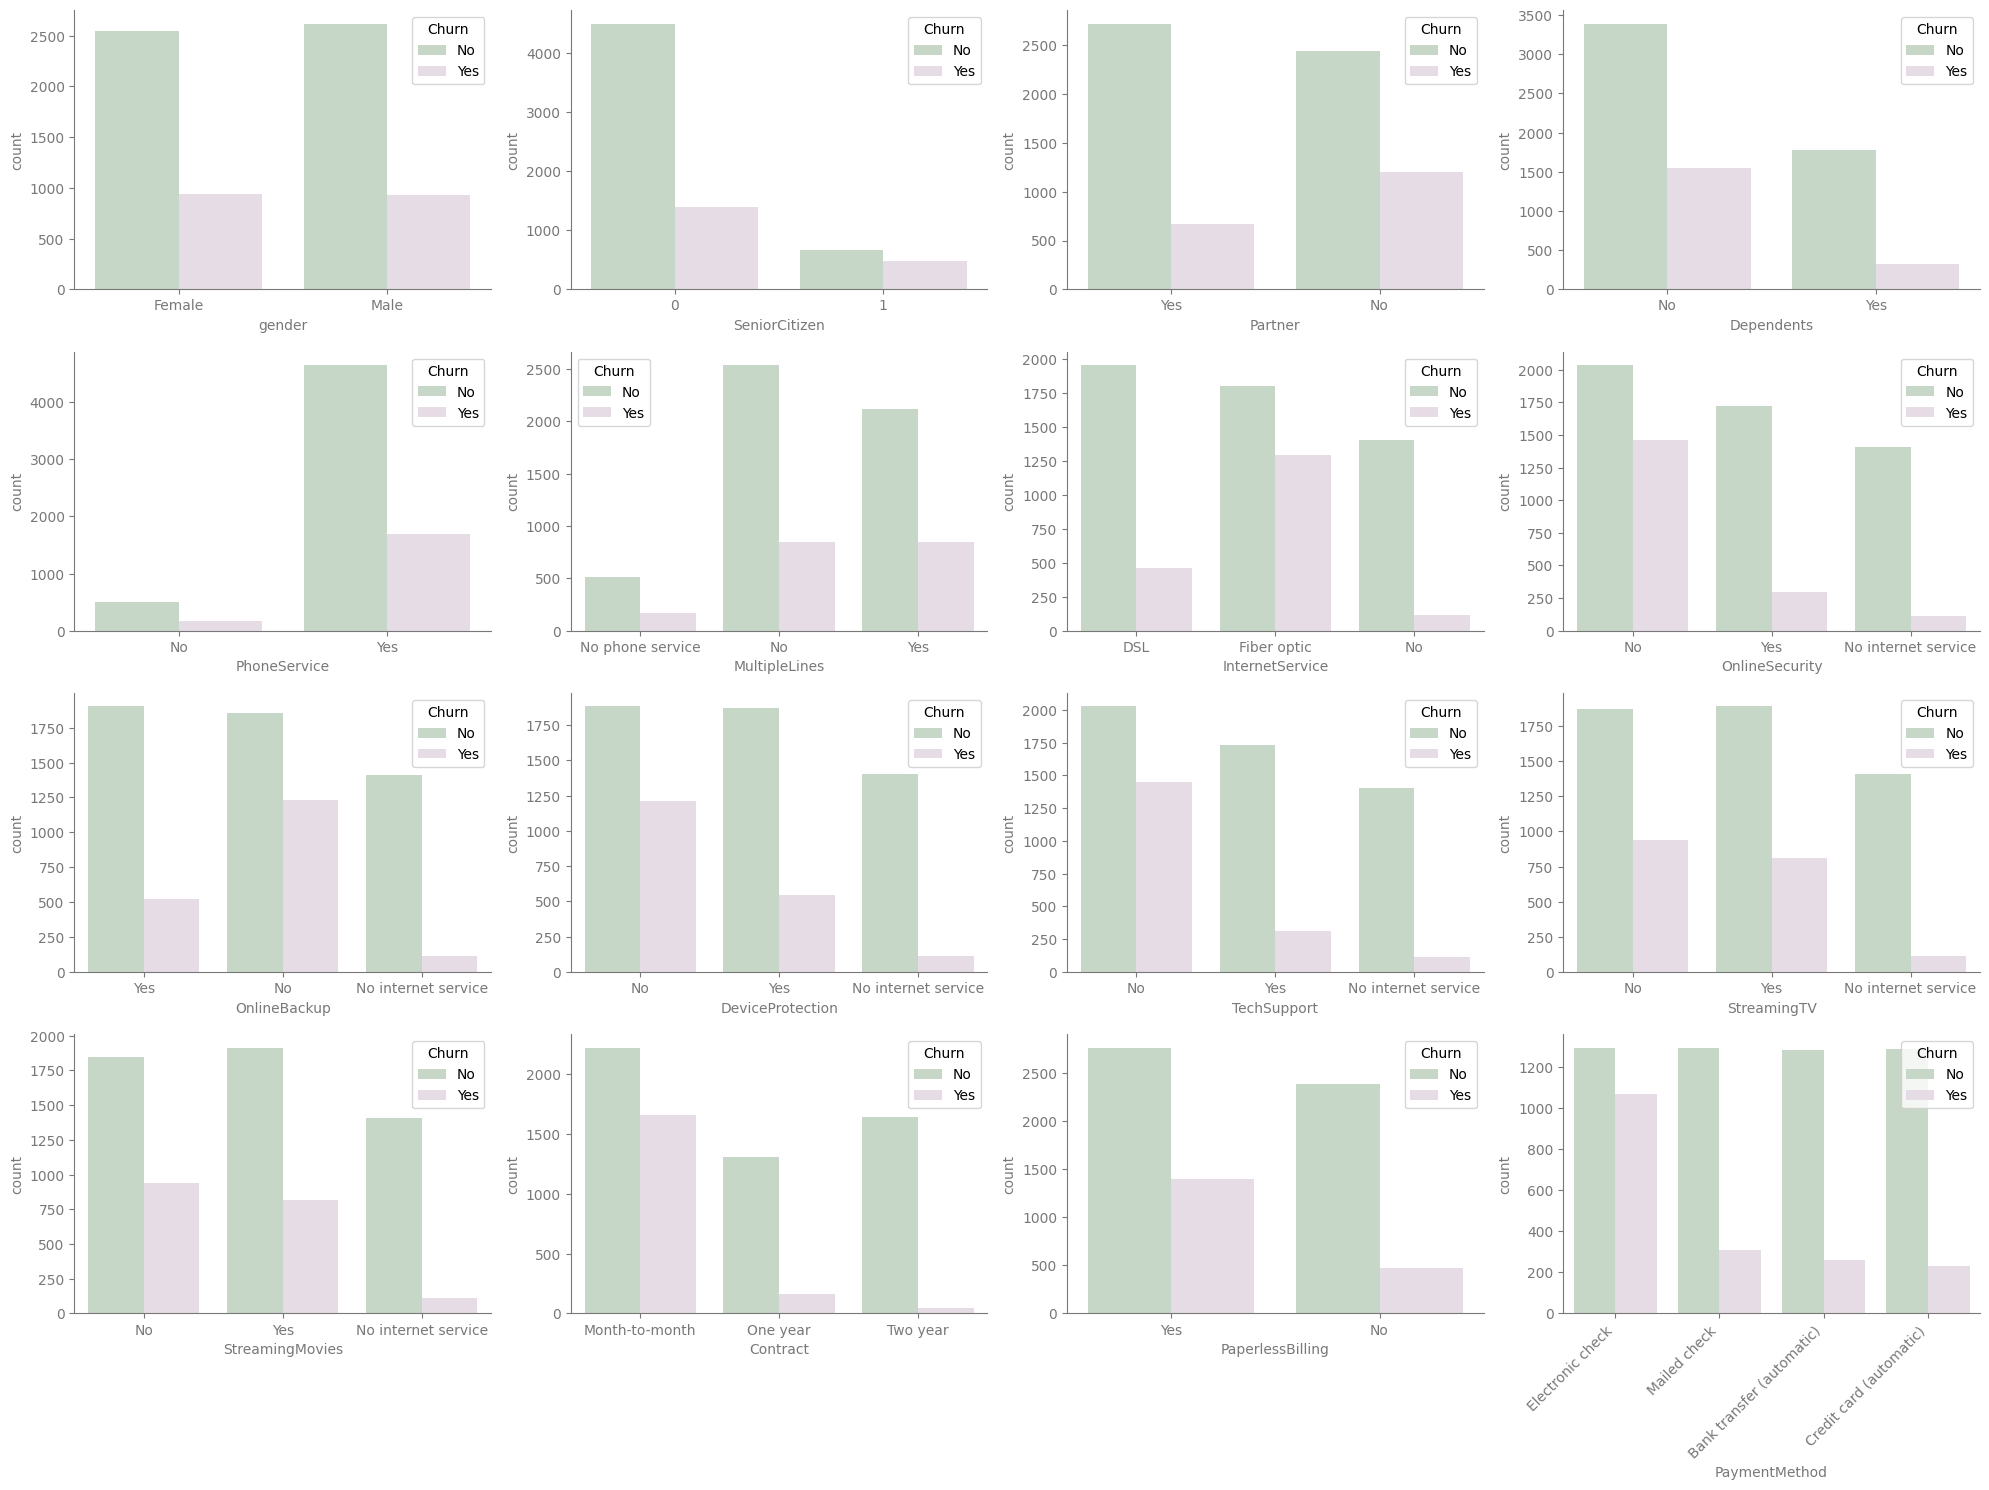

In [14]:
#Deefining style parameters for the plot / Definindo os parâmetros de style para o matplotlib
rc_params = {'axes.edgecolor':'#787878',
             'axes.titlecolor':'#787878',
             'axes.labelcolor': '#787878',
             'axes.spines.top':False,
             'axes.spines.right': False,
             'xtick.color': '#787878',
             'ytick.color': '#787878',
             'axes.titleweight': 'bold',
             'axes.titlesize': 12,
             'axes.titlepad': 12
             }

# Create a light pastel version of each base color / cria uma paleta de cores pastel para o plot
pastel_palette = [
    sns.light_palette("#8FBC8F", n_colors=10)[4],  #Dark Sea green / verde escuro marinho
    sns.light_palette("#D8BFD8", n_colors=10)[4]   #Light purple / roxo claro
]

# Set the custom pastel palette /seta a plaeta de cores custumizadas
sns.set_palette(pastel_palette)

#Setting matplotlib parameters / setando os parâmetros no matplotlib
with plt.rc_context(rc_params):

  #Creating class figure and axes / Instanciando a classe figure e axes
  fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (20,15))

  #Deefining a counter for axes / Definindo um contandor para pecorrer o axes
  cont_row = 0
  cont_col = 0

  # Create a 4x4 grid of subplots / cria um grid 4x4 de subplots
  for col in df_var["feature"].loc[(df_var['Categórico'] == 1) & (df_var['feature'] != "Churn") ].to_list():
    #Excludes the 'Churn' feature from the plots
    if col != 'Churn':
      sns.cubehelix_palette(as_cmap=True)
      sns.countplot(x=col, #the x axis of the plot / o que está no eixo X do plot
                    data=df, #Data Base / Base dos dados
                    ax = ax[cont_row, cont_col], #defining which subplot is in use / define qual subplot esta em uso
                    hue = "Churn", #Used to add a third cathegorical feature dividing by colors / Usado para adicionar uma teerceira variável categorica separando por cores
                    palette = pastel_palette #Color palette definition / definição da paleta de cores
                    )

      #Defining a logic for incremeneting the counters / Definindo uma lógica de incremento nos contadores do axes
      if cont_col == 3:
        cont_col = 0
        cont_row = cont_row + 1
      else:
        cont_col = cont_col + 1

    #Rotates the PaymentMethod ticks / Rotaciona o eixo x da variável PaymentMethod
    plt.xticks(rotation=45, ha='right')

    #Show the plot / Exibindo o gráfico
    plt.tight_layout()


As observed, individuals without dependents or partners are more likely to cancel their services, as well as those who have landline phone service at their residences. Moreover, customers who do not subscribe to additional online services such as security or backup, and those without technical support, are also at a higher risk of cancelling their services. It's worth noting that providing these individuals with such services could potentially mitigate this issue, a strategy that may also apply to the provision of streaming movies and TV services.

Additionally, customers with month-to-month contracts are more prone to leaving the customer base, possibly due to the flexibility offered by such contracts, as there are no contractual obligations that restrict their actions. Lastly, clients who use electronic check payment methods are also more likely to leave. This could be attributed to the heightened awareness of their expenditure when using this method, compared to automatic payment methods where individuals may not be as cognizant of their expenses unless they closely monitor their finances.

Considering that telecommunications companies commonly offer product bundles, it makes sense to analyze groups of services together. Initially, the analysis could focus on phone, internet, and streaming services together, followed by the inclusion of online services and technical support.

---

Como observado, indivíduos sem dependentes ou parceiros têm uma maior probabilidade de cancelar seus serviços, assim como aqueles que possuem serviço de telefone fixo em suas residências. Além disso, clientes que não assinam serviços online adicionais, como segurança ou backup, e aqueles sem suporte técnico, também estão em maior risco de cancelar seus serviços. Vale ressaltar que fornecer esses serviços a esses indivíduos poderia mitigar esse problema, uma estratégia que também pode ser aplicada à oferta de serviços de streaming de filmes e TV.

Adicionalmente, clientes com contratos mensais são mais propensos a sair da base de clientes, possivelmente devido à flexibilidade oferecida por esses contratos, já que não há obrigações contratuais que restrinjam suas ações. Por fim, clientes que usam métodos de pagamento com cheque eletrônico também têm maior probabilidade de sair. Isso poderia ser atribuído à maior consciência de seus gastos ao usar esse método, em comparação com métodos de pagamento automáticos, nos quais as pessoas podem não estar tão cientes de seus gastos, a menos que monitorem de perto suas finanças.

Considerando que empresas de telecomunicações comumente oferecem pacotes de produtos, faz sentido analisar grupos de serviços juntos. Inicialmente, a análise poderia se concentrar em telefone, internet e serviços de streaming juntos, seguidos pela inclusão de serviços online e suporte técnico.

### Combo analisys / Analise Combinada
As sad before, makes sense to do a combo analysis, first unsing the following features and consider only clients that have left the custumer base

---
Como dito anteriormente, é sensato se fazer uma análsie combinada, dado o teor do negócio, inicialmente utilizando as seguintes features e considerando apenas clientes que deiaram a base
<br>

---

- MultipleLines:
    - No
    - No phone service
    - Yes
- InternetService:
    - DSL
    - Fiber optic
    - No

- StreamingTV:
    - No
    - No internet service
    - Yes
- StreamingMovies:
    - No
    - No internet service
    - Yes

<ipython-input-15-cfd14d0f1a4d>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Combination', y='count', data=df_plot, palette='viridis')


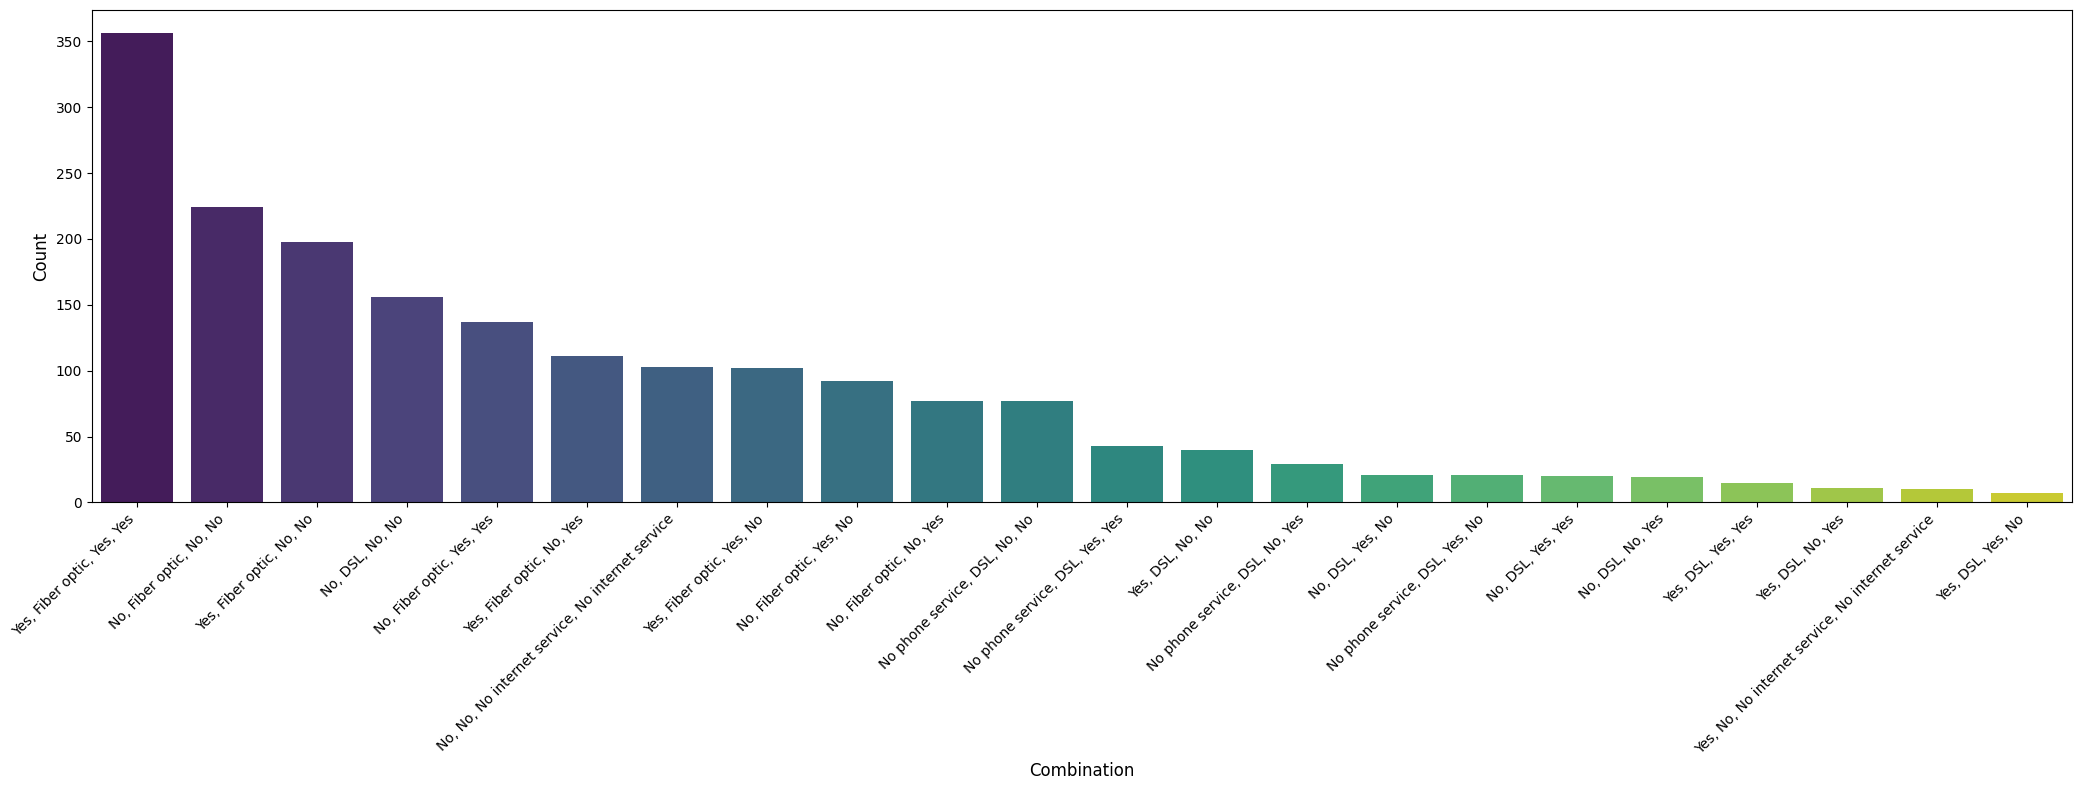

In [15]:
# Creates a clean dataframe / Criar DataFrame
df_plot = pd.DataFrame()

#Filters for only churned clients / Filtra apenas clientes que deixaram a base
df_churned = df.loc[df.Churn == 'Yes']

# Count the unic combinations / Contar as combinações únicas
df_plot['Combination'] = (
    df_churned['MultipleLines'].astype(str) + ", " +
    df_churned['InternetService'].astype(str) + ", " +
    df_churned['StreamingTV'].astype(str) + ", " +
    df_churned['StreamingMovies'].astype(str)
)

df_plot = df_plot['Combination'].value_counts().reset_index()
df_plot.sort_values(by='count', ascending=False)

# Plotar gráfico de barras horizontal
plt.figure(figsize=(21, 8))

sns.barplot(x='Combination', y='count', data=df_plot, palette='viridis')
plt.xlabel('Combination', fontsize=12, )
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count', fontsize=12)
# Adjust the spacing between subplots / ajusta os espaços entre os subplots
plt.tight_layout()

# Show the plot / exibe o plot
plt.show()

As visible from the plot, the majority of departing clients are those who have subscribed to every service available from the company. This is understandable, as another company could have enticed these customers by offering a better deal on the same service bundle. It's common to overlook existing clients while focusing on acquiring new ones, which often leads to targeting our competitors' client base, resulting in the loss of some clients.

On the other hand, the second most common churned clients are those who have only one phone line and do not utilize any other services. One possibility is that landline phone service may no longer be necessary due to the widespread adoption of cellphone lines, prompting clients who solely rely on landline phones to cancel their service.

Lastly, in third place, are those who do not subscribe to any streaming services, regardless of whether they have a phone line or not. This could again indicate that another company has offered a better deal, including features that these clients didn't have access to for the same price, for example.

Of course, all the factors mentioned here are mere possibilities that should be further investigated within the company by cross-referencing data with other departments.

---

Como é visível no gráfico, a maioria dos clientes que cancelaram ppossuem todos os serviços elencados nesta analise. Isso é compreensível, pois outra empresa pode ter atraído esse cliente oferecendo um negócio melhor pelo mesmo pacote de serviços. É comum esquecer os clientes atuais enquanto se tenta encontrar novos para a base. Isso geralmente significa focar na base de clientes da concorrência, o que acontece em ambos os sentidos, contribuindo para a perda de alguns clientes.

Por outro lado, os segundos clientes que mais cancelaram são aqueles que possuem apenas o serviço de telefone fixo. Uma possibilidade é a de que o serviço de linha telefônica não seja mais necessário devido à migração para linhas de celular, tornando as linhas fixas inutilizadas.

Claro, todas as causas apresentadas são apenas possibilidades que devem ser melhor investigadas dentro da empresa, cruzando dados com outros setores também.

Now, lets add the online and technical support services to see if there is any change in the scenerio found before. So now the analysis take into account the following features (for an easy visualization, only the 5 biger churned combos will be ploted)

---

Agora, vamos adicionar os serviços online e de suporte tecnico para vermos se ha alguma mudança no cenário encontrado anteriormente. Agora a analise leva em consideração as seguintes features (para facilitar a visualização, apenas as 5 combinações com maior churn serão plotadas)

---
<br>

- MultipleLines:
    - No
    - No phone service
    - Yes
- InternetService:
    - DSL
    - Fiber optic
    - No

- StreamingTV:
    - No
    - No internet service
    - Yes
- StreamingMovies:
    - No
    - No internet service
    - Yes

- OnlineSecurity:
    - No
    - No internet service
    - Yes
- OnlineBackup:
    - No
    - No internet service
    - Yes
- DeviceProtection:
    - No
    - No internet service
    - Yes
- TechSupport:
    - No
    - No internet service
    - Yes

<ipython-input-16-cd97dab66bcb>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Combination', y='count', data=df_plot.head(), palette='viridis')


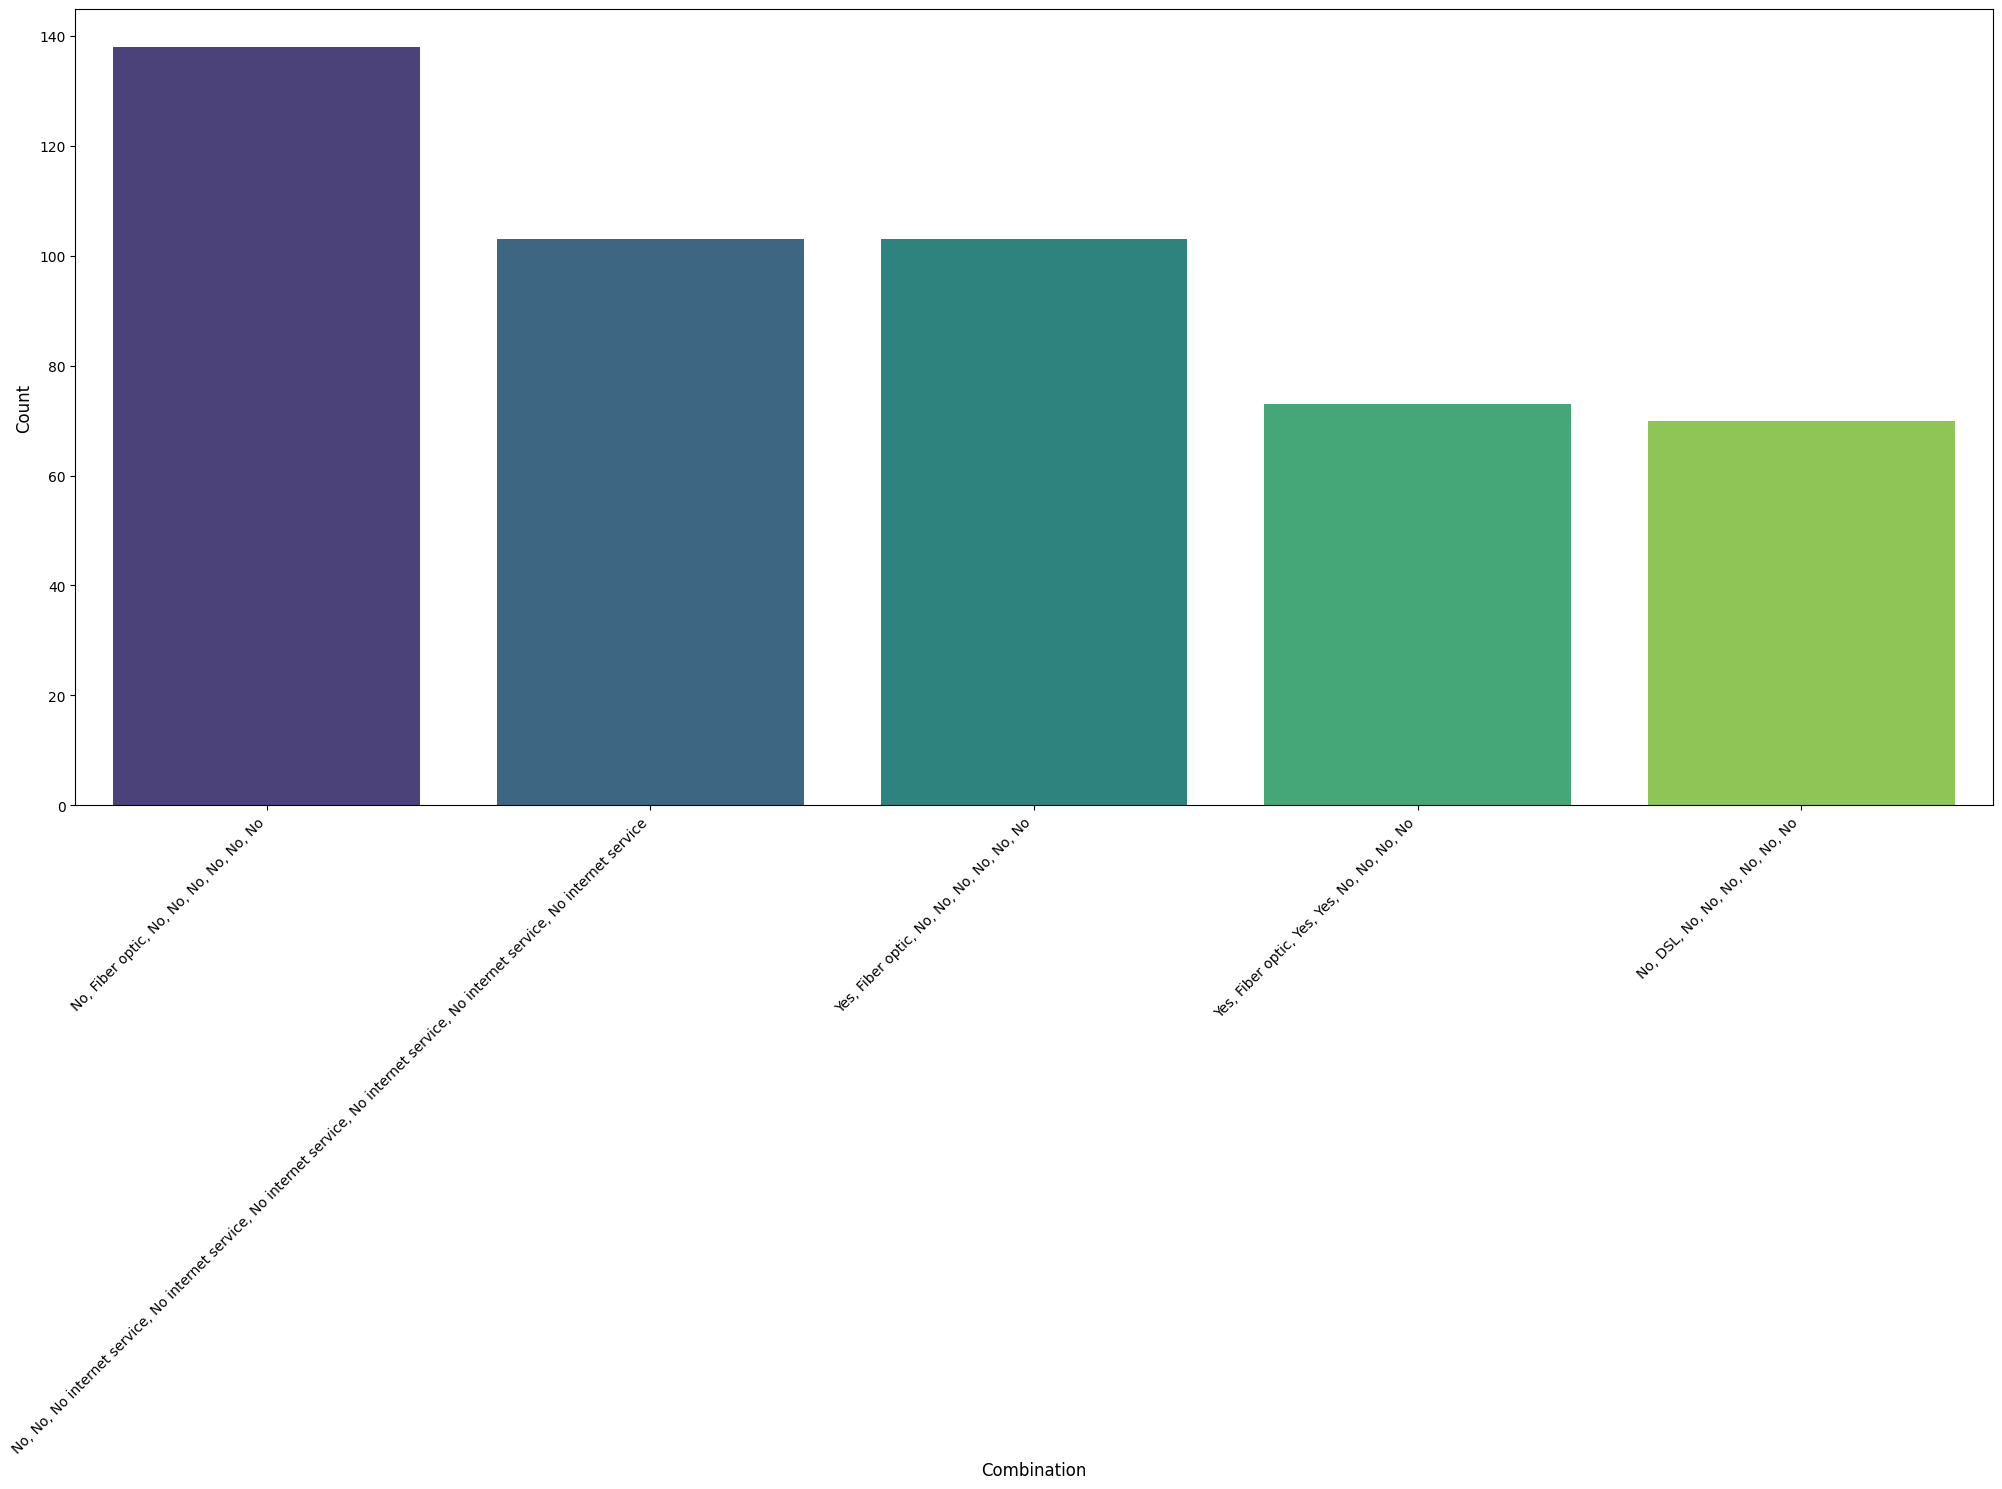

In [16]:
# Creates a clean dataframe / Criar DataFrame
df_plot = pd.DataFrame()

#Filters for only churned clients / Filtra apenas clientes que deixaram a base
df_churned = df.loc[df.Churn == 'Yes']

# Count the unic combinations / Contar as combinações únicas
df_plot['Combination'] = (
    df_churned['MultipleLines'].astype(str) + ", " +
    df_churned['InternetService'].astype(str) + ", " +
    df_churned['StreamingTV'].astype(str) + ", " +
    df_churned['StreamingMovies'].astype(str) + ", " +
    df_churned['OnlineSecurity'].astype(str) + ", " +
    df_churned['OnlineBackup'].astype(str) + ", " +
    df_churned['DeviceProtection'].astype(str) + ", " +
    df_churned['TechSupport'].astype(str)
)

df_plot = df_plot['Combination'].value_counts().reset_index()
df_plot.sort_values(by='count', ascending=False)

# Plotar gráfico de barras
plt.figure(figsize=(21, 15))

sns.barplot(x='Combination', y='count', data=df_plot.head(), palette='viridis')
plt.xlabel('Combination', fontsize=12, )
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count', fontsize=12)
# Adjust the spacing between subplots / ajusta os espaços entre os subplots
plt.tight_layout()

# Show the plot / exibe o plot
plt.show()

In [17]:
df_plot['Percentage'] = df_plot['count']/df_plot['count'].sum()*100
df_plot

,Combination,count,Percentage
0,"No, Fiber optic, No, No, No, No, No, No",138,7.383628
1,"No, No, No internet service, No internet servi...",103,5.510968
2,"Yes, Fiber optic, No, No, No, No, No, No",103,5.510968
3,"Yes, Fiber optic, Yes, Yes, No, No, No, No",73,3.905832
4,"No, DSL, No, No, No, No, No, No",70,3.745318
...,...,...,...
232,"No phone service, DSL, No, Yes, No, No, Yes, Yes",1,0.053505
233,"No, DSL, Yes, No, No, Yes, Yes, Yes",1,0.053505
234,"No, Fiber optic, No, No, No, Yes, No, Yes",1,0.053505
235,"Yes, DSL, Yes, No, Yes, No, No, No",1,0.053505


As we can see, the second place is still occupied by those with only one phone line, strengthening the theory that cellphones are taking over. Overall, the scenario has changed for the first and third positions, showing that fiber optics clients are more likely to cancel their contracts regardless of having additional services or not. In general, having additional services helps to retain clients, as the majority of churn is coming from those who only have basic features (considering streaming a basic feature nowadays).

---

Como podemos ver, o segundo lugar ainda é ocupado por aqueles que têm apenas uma linha telefônica, fortalecendo a teoria de que os celulares estão dominando. De modo geral, o cenário mudou para as primeiras e terceiras posições, mostrando que os clientes de fibra óptica são mais propensos a cancelar seus contratos, independentemente de terem ou não serviços adicionais. Em geral, ter serviços adicionais ajuda a reter clientes, já que a maioria dos cancelamentos vem daqueles que possuem apenas recursos básicos (considerando o streaming um recurso básico nos dias de hoje)

## Data Transformation

After treating null values and a brief analysis on what the data is saiyng, let's understand how is distribuited the data from a model perspective, that means, what changes are needed to suit the data for the chosen moddeling proccess?

---

Após remover valores nulos e fazer uma breve análise do que os dados podem nos deizer, vamos explorar a sua situação, ou seja, o que precisa ser feito para que possam ser uutilizados em determinado modelo?

First let's check if the data based is well balanced and treat it if necessary

---

Inicialmente, vamos verificar se a base dados é balanceada e trata-la se necessário

<Axes: xlabel='Churn', ylabel='count'>

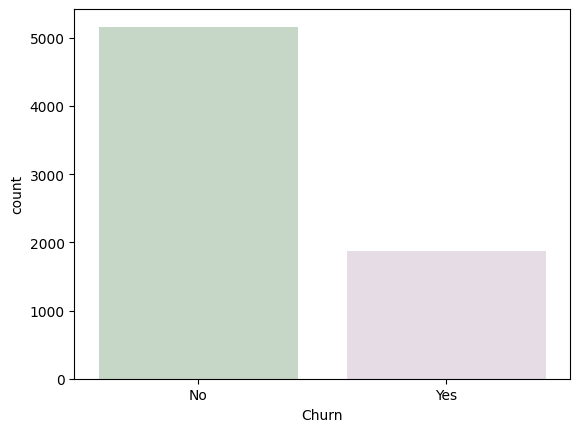

In [18]:
sns.countplot(data=df, x='Churn', hue='Churn')

It is visible that there are more than twice entrys for *No* than for *Yes* in the data set, considering that there are enought entrys, one way for balancing it is to chose randonly some of the *No* entrys to not use, another way is to use *Ensemble Learning*, that means to create multiple models (weak models) and combine them in a stroger one. This method helps to create a more robust than an individual model

---

É visível que há mais que o dobro de entradas para *Não* do que para *Sim* no conjunto de dados. Considerando que há entradas suficientes, uma maneira de balanceá-lo é escolher aleatoriamente algumas das entradas *Não* para não usar. Outra maneira é utilizar o *Ensemble Learning*, o que significa criar múltiplos modelos (modelos fracos) e combiná-los em um modelo mais forte. Este método ajuda a criar um modelo mais robusto do que um modelo individual.

### Cathegorical features

  As seen before, there are features that are cathegorical, which means that, for the model that's going to be used - based on a decision three - it is necessary to transform the categorical variables into numerical ones so that the model can identify patterns related to them. Initially, we will consider that each type of categorical variable will be a distinct value, with the awareness that this may change later to improve the model's performance and reduce the dimensionality of the variables.

---

Como visto anteriormente, algumas das variáveis são categóricas, isso significa que, para o modelo que será utilizado - baseado em arvores de decisão - se faz necessário transforma-las em variáveis numéricas, de forma que o modelo possa encontrar padrões referentes a elas.
A principio, vamos considerar que cada um dos tipos de variáveis categóricas será um valor distinto, com a consciencia de que isso pode mudar mais a frente afim de melhorar o desempenho do modelo e reduzir a dimensionalidade das variáveis.

| Variável Categórica | Valores |
|-----|-----|
|gender | Female, Male
|Partner | Yes, No
|Dependents | No, Yes
|PhoneService | No, Yes
|MultipleLines | No phone service, No, Yes
|InternetService | DSL, InternetService, Fiber optic, No
|OnlineSecurity | No, Yes, No internet service
|OnlineBackup | Yes, No, No internet service
|DeviceProtection | No, Yes, No internet service
|TechSupport | No, Yes, No internet service
|StreamingTV | No, Yes, No internet service
|StreamingMovies | No, Yes, No internet service
|Contract | Month-to-month, One year, Two year
|PaperlessBilling | Yes, No
|PaymentMethod | Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)
|Churn | No, Yes


For binary features the label encoder is going to be used, as for the no binary the one-hot-encode will be applyed, since the calssificator can understand that there is some hierarqui where it doesn't exist

---

Para as features binárias será utilziado o label encoder, ja para as nao binarias será utilizado o one hot encoder, de forma que o classificador nao identifique uma possível hierarquia em um contexto inexistente

In [19]:
df_var.head()

,feature,Tipo,Categórico,Binário,Valores Categóricos,Min,Max,Percentual de Nulos,Média,STD,25%,50%,75%
0,gender,object,1,1,"[Male, Female]",Female,Male,0.0,[N/A],[N/A],[N/A],[N/A],[N/A]
1,SeniorCitizen,int64,1,1,"[0, 1]",0,1,0.0,[N/A],[N/A],[N/A],[N/A],[N/A]
2,Partner,object,1,1,"[No, Yes]",No,Yes,0.0,[N/A],[N/A],[N/A],[N/A],[N/A]
3,Dependents,object,1,1,"[No, Yes]",No,Yes,0.0,[N/A],[N/A],[N/A],[N/A],[N/A]
4,tenure,int64,0,0,[N/A],0,72,0.0,32.371149,24.559481,9.0,29.0,55.0


In [20]:
binary_features = df_var.loc[(df_var['Binário'] == 1) & (df_var['Tipo'] == 'object'), 'feature']
binary_features.to_list()

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [21]:
non_binary_features = df_var.loc[(df_var['Binário'] == 0) & (df_var['Tipo'] == 'object'), 'feature']
non_binary_features.to_list()

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [22]:
# Declaring the encoder for binary features / declarando oencoder para features binárias
le = LabelEncoder()

# Create a copy of the original df for encoding / cria uma copia do df original para encoding
df_encoded = df.copy()

#realiza o encoding das variáveis
for column in binary_features:

  le.fit(df_encoded[column])
  classes = le.classes_
  df_encoded[column] = le.transform(df_encoded[column])
  transformed_classes = df_encoded[column].unique()
  print(classes)
  print(transformed_classes)

df_encoded.head()

['Female' 'Male']
[0 1]
['No' 'Yes']
[1 0]
['No' 'Yes']
[0 1]
['No' 'Yes']
[0 1]
['No' 'Yes']
[1 0]
['No' 'Yes']
[0 1]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [23]:
#Encoding for non binary features
df_encoded = pd.get_dummies(df_encoded, columns = non_binary_features, dtype=int)
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


The data concerning about having or not internet services is showing multiple times, let's clean it by droping the columns that came from features of additional services, such as streaming.

---

Os dados relacionados a ter ou não serviços de internet estão aparecendo várias vezes, então vamos limpá-los removendo as colunas que vêm de recursos de serviços adicionais, por exemplo so de streamings.

In [24]:
drop_columns = df_encoded.loc[:,df_encoded.columns.str.endswith("_No internet service")].columns
df_encoded = df_encoded.drop(columns=drop_columns)
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,1,0,1,0,0,0,0,1,0


## Creating the execution pipeline / Criando o fluxo de execução

### Chosen Method / Método Escolhido
Based on the nature of the issue found, the XGBoost method will initially be used for training. The model uses weak models to compose a strong model, very much like getting 'a seccond opinion' when going in to a doctor

---

Com base na natureza do problema encontrado, o método XGBoost será inicialmente utilizado para o treinamento. O modelo utiliza modelos fracos para compor um modelo forte, muito parecido com buscar 'uma segunda opinião' ao ir ao médico.
<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/0*DHhpPPwcNUMEB6N3.gif" alt="Imagem animada">

### Splitting the data / Separado os dados
Now it is time to split our data into feature matrix and target vector, next we are going to need to ressample it and split it again into training, test and validation data sets

---

Agora é o momento de separarmos os dados em feature amtrix e target vector, em seguida, precisaremos reamostra-lo para balancear os dados e então, dividiremos estes novamente, agora em dados de treino, dados de teste e dados de validação

In [25]:
X = df_encoded.drop(columns=['Churn']) #Feature Matrix
y = df_encoded['Churn'] #Target Vector

In [26]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,1,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,1,0,1,0,0,0,0,1,0


In [27]:
# Splits the feature matrix and target vector into train and test sets / Separa a matriz de features e o vetor alvo em sets de teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, #Data sto be splitted / Dados a serem divididos
                                                    test_size=0.2, #Percentage of the data reserved for testing / Percentual dos dados reservados para testes
                                                    random_state=42 #Factor that guarantee the repeatability of the split / Faotr que garante a repetibilidade da divisão
                                                    )

### Pipeline Creation / Criação do pipeline

For easing processing of the data, a pipeline will be created, allowing for cross-validation and proper scaling and oversampling of each fold.

- For improved model accuracy, class balancing is performed using one of the following methods:
    - SMOTE (Synthetic Minority Over-sampling Technique): Oversamples the minority class to address class imbalance. More information on SMOTE can be found [here](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification).
    - Neighbourhood Cleaning Rule (NCR): Undersamples the majority class to address class imbalance.More information on NCR can be found [here](https://rdrr.io/cran/unbalanced/man/ubNCL.html)
    Both methods are particularly useful for imbalanced datasets where one class is significantly more prevalent than the other.

- If no resampling strategy is specified, the pipeline will be created without any class balancing.

- To enhance model performance, data normalization is applied using the z-score method. This ensures that all feature values are normalized around their mean values, improving model performance and stability. The z-score normalization formula is: $$ z = \frac{{x - u}}{{s}} $$ Where *u* is the mean of the training data and *s* is the standard deviation of the training data.

---

Para facilitar o processamento dos dados, um pipeline será criado, permitindo o uso de validação cruzada e a aplicação adequada de escalonamento e sobreamostragem em cada dobra.

- Para melhorar a precisão do modelo, o balanceamento de classes é realizado usando um dos seguintes métodos:
    - SMOTE (Synthetic Minority Over-sampling Technique): Sobreamostra a classe minoritária para lidar com o desequilíbrio de classes. Mais informações sobre o SMOTE podem ser encontradas [aqui](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification).
    - Neighbourhood Cleaning Rule: Subamostra a classe majoritária para lidar com o desequilíbrio de classes. Mais informações sobre o NCR podem ser encontradas [aqui](https://rdrr.io/cran/unbalanced/man/ubNCL.html).
    Ambos os métodos são especialmente úteis para conjuntos de dados desbalanceados, nos quais uma classe é significativamente mais prevalente do que a outra.

- Se nenhuma estratégia de reamostragem for especificada, o pipeline será criado sem nenhum balanceamento de classes.

- Para melhorar o desempenho do modelo, a normalização dos dados é aplicada usando o método de escore z. Isso garante que todos os valores das características sejam normalizados em torno de suas médias, melhorando o desempenho e a estabilidade do modelo. A fórmula de normalização do escore z é: $$ z = \frac{{x - u}}{{s}} $$ Onde *u* é a média dos dados de treinamento e *s* é o desvio padrão dos dados de treinamento.


In [28]:
def run_pipeline(X, y, classifier, cv=5, ressample=None):
    """
    Constrói e executa um pipeline de pré-processamento de dados e treinamento de modelo.

    Constructs and executes a pipeline for data preprocessing and model training.

    Parâmetros:
    Parameters:
    X : array-like, shape (n_samples, n_features)
        Matriz de características (atributos) do conjunto de dados.
        Matrix of features (attributes) of the dataset.

    y : array-like, shape (n_samples,)
        Vetor de rótulos (classes) correspondentes a cada exemplo em X.
        Vector of labels (classes) corresponding to each example in X.

    classifier : objeto classificador
        Algoritmo classificador a ser utilizado.
        Algorithm classifier to be used.

    ressample : {'over', 'under', None}, default=None
        Tipo de balanceamento de classes a ser aplicado.
        Type of class balancing to be applied.

        - 'over': Sobreamostragem utilizando SMOTE.
          Over-sampling using SMOTE.

        - 'under': Subamostragem utilizando Neighbourhood Cleaning Rule.
          Under-sampling using Neighbourhood Cleaning Rule.

        - None: Nenhum balanceamento.
          No balancing.

    Retorna:
    Returns:
    pipeline : ImbPipeline
        Um objeto ImbPipeline que encapsula o pipeline de pré-processamento e o classificador.
        An ImbPipeline object encapsulating the preprocessing pipeline and the classifier.
    """

    """Construção do pipeline com base na estratégia de reamostragem selecionada. / Constructing the pipeline based on the selected resampling strategy."""
    if ressample == 'over':
        pipeline = ImbPipeline(steps=[
            ('scaler', StandardScaler()),  # Normalização dos dados usando z-score / Data normalization using z-score
            ('smote', SMOTE(random_state=42)),  # Sobreamostragem / Over-sampling
            ('classifier', classifier)  # Classificador / Classifier
        ], verbose=True)
        print('Oversampled')

    elif ressample == 'under':
        pipeline = ImbPipeline(steps=[
            ('scaler', StandardScaler()),  # Normalização dos dados usando z-score / Data normalization using z-score
            ('RUS', RandomUnderSampler()),  # Subamostragem / Under-sampling
            ('classifier', classifier)  # Classificador / Classifier
        ], verbose=True)
        print('Undersampled')
    else:
        pipeline = ImbPipeline(steps=[
            ('scaler', StandardScaler()),  # Normalização dos dados usando z-score / Data normalization using z-score
            ('classifier', classifier)  # Classificador / Classifier
        ], verbose=True)
        print("Not Re-sampled")
    cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='recall', error_score='raise')

    print("Cross-validation scores:", cv_scores)
    print("Recall: {:.2f} (+/- {:.2f})".format(cv_scores.mean(), cv_scores.std()))
    print("")

    return cv_scores.mean()

First, lets run the pipeline not ressamppling the data, then oversamppling and undersampling it to find the best way to deal with de imbalance.
The used classifier is XGBoost, as said before, without any hyperparameter optimization in this first run.

---

Primeiramente, vamos executar o pipeline sem reamostragem dos dados e, em seguida, aplicar a sobreamostragem e a subamostragem para encontrar a melhor maneira de lidar com o desequilíbrio.

O classificador utilizado é o XGBoost, conforme mencionado anteriormente, sem otimização de hiperparâmetros nesta primeira execução.


In [29]:
#Run a pipeline using XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # Classificador baseado em uma árvore de decisão que usa gradiente para aprimorar sua performance / Classifier based on a decision tree with gradient boosting

#No ressample
score_baseline = run_pipeline(X_train, y_train, cv=5, classifier=xgb)

#Oversample
score_oversample = run_pipeline(X_train, y_train, cv=5, classifier=xgb, ressample='over')

#Undersample
score_undersample = run_pipeline(X_train, y_train, cv=5, classifier=xgb, ressample='under')

Not Re-sampled
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.2s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.1s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.1s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.1s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.1s
Cross-validation scores: [0.55518395 0.54849498 0.50167224 0.51839465 0.54180602]
Recall: 0.53 (+/- 0.02)

Oversampled
[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] ............. (step 2 of 3) Processing smote, total=   0.1s
[Pipeline] ...

### Hyperparameter optimization / Otimização de hiperparametros

As the data has shown, the best decision is to use an undersampled data set.
<br>
With that in mind, let's now optimize the classifier using grid search in the hyperparameters

In [51]:
#Scaling the data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

#Undersampling RUS
rus = RandomUnderSampler()
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

#instanciating model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

In [52]:
param_grid = {
    'booster': ['gbtree', 'dart'],  # Optimization type, both based on decision trees, but dart has more robustness against overfitting / Tipo de otimizador, ambos baseados em árvores de decisão, porém dart possui maior robustez em relação a overfitting
    #'learning_rate': [0.3, 0.5], #Learning rate dfines the agressiveness on the pprediction / a taxa de aprendizado define a agressividade da predição
    #'max_depth': [3, 6, 9], #Max depth of the tree, the max number of branches / numero maximo de galhos da arvore
    'sample_type' : ['uniform', 'weighted'] #Used only for Dart when droping the leaves, the dropp can be uniform or based on the weight of each leaf / Usado somente no DART na exclusao de folhas da arvore, podendo ser uniforme ou baseada no peso daquela folha
    }

In [53]:
grid_search = GridSearchCV(estimator=xgb, #defines the pipeline to be used / define o fluxo de execução a ser usado
                           param_grid=param_grid, #Defines de parameter grid to be used / define a tabela de parametros a ser variada
                           scoring='recall', #Evaluation method / metodo de avaliação
                           cv=3, #number of cross validation folds / numero de 'dobras' da validação cruzada
                           verbose=2, #shows the time of execution and the score of the fold / mostra otempo de execução e o score da 'dobra'
                           n_jobs=-1 #sets to use the maximum number of available processors / seta para utilizar o maior numero de processadores disponíveis
                           )

grid_result = grid_search.fit(X_train_under, y_train_under)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Melhor: 0.7518450555729933 para {'booster': 'gbtree', 'sample_type': 'uniform'}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:22:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "sample_type" } are not used.

  warnings.warn(smsg, UserWarning)


Now let's work with the learning rate and the depth of the model toghether, using the 'gbtree' booster

---

Agora vamos trabalhar com a taxa de apprendizado e a profundidade do modelo juntos, usando o booster 'gbtree'

In [54]:
param_grid = {
    'booster': ['gbtree'],  # Optimization type, both based on decision trees, but dart has more robustness against overfitting / Tipo de otimizador, ambos baseados em árvores de decisão, porém dart possui maior robustez em relação a overfitting
    'learning_rate': [0.0001, 0.001, 0.01, 0.1], #Learning rate dfines the agressiveness on the pprediction / a taxa de aprendizado define a agressividade da predição
    'max_depth': [1, 3, 6], #Max depth of the tree, the max number of branches / numero maximo de galhos da arvore
    }

grid_search = GridSearchCV(estimator=xgb, #defines the pipeline to be used / define o fluxo de execução a ser usado
                           param_grid=param_grid, #Defines de parameter grid to be used / define a tabela de parametros a ser variada
                           scoring='recall', #Evaluation method / metodo de avaliação
                           cv=3, #number of cross validation folds / numero de 'dobras' da validação cruzada
                           verbose=2, #shows the time of execution and the score of the fold / mostra otempo de execução e o score da 'dobra'
                           n_jobs=-1 #sets to use the maximum number of available processors / seta para utilizar o maior numero de processadores disponíveis
                           )

grid_result = grid_search.fit(X_train_under, y_train_under)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Melhor: 0.8889693711385287 para {'booster': 'gbtree', 'learning_rate': 0.0001, 'max_depth': 1}


Now, lets test for the 'gamma', that is the loss' function minimum value needed to branch a node

---

Agora testaremos para o parametro gamma, que é o menor valor da função de perda necessário para que se possa dividir em um novo galho aquele nó

In [55]:
param_grid = {
    'booster': ['gbtree'],  # Optimization type, both based on decision trees, but dart has more robustness against overfitting / Tipo de otimizador, ambos baseados em árvores de decisão, porém dart possui maior robustez em relação a overfitting
    'learning_rate': [0.0001], #Learning rate dfines the agressiveness on the pprediction / a taxa de aprendizado define a agressividade da predição
    'max_depth': [1], #Max depth of the tree, the max number of branches / numero maximo de galhos da arvore
    'gamma': [0, 0.1, 0.2],
    }

grid_search = GridSearchCV(estimator=xgb, #defines the pipeline to be used / define o fluxo de execução a ser usado
                           param_grid=param_grid, #Defines de parameter grid to be used / define a tabela de parametros a ser variada
                           scoring='recall', #Evaluation method / metodo de avaliação
                           cv=3, #number of cross validation folds / numero de 'dobras' da validação cruzada
                           verbose=2, #shows the time of execution and the score of the fold / mostra otempo de execução e o score da 'dobra'
                           n_jobs=-1 #sets to use the maximum number of available processors / seta para utilizar o maior numero de processadores disponíveis
                           )

grid_result = grid_search.fit(X_train_under, y_train_under)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Melhor: 0.8889693711385287 para {'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.0001, 'max_depth': 1}


Finally, we are going to evaluate the number of estimators used in the model, that means, the number of iterations in the model

---

Por fim, vmaos avaliar o numero de estimadores suados no modelo, ou seja, o número de iterações realizado

In [56]:
param_grid = {
    'booster': ['gbtree'],  # Optimization type, both based on decision trees, but dart has more robustness against overfitting / Tipo de otimizador, ambos baseados em árvores de decisão, porém dart possui maior robustez em relação a overfitting
    'learning_rate': [0.0001], #Learning rate dfines the agressiveness on the pprediction / a taxa de aprendizado define a agressividade da predição
    'max_depth': [1], #Max depth of the tree, the max number of branches / numero maximo de galhos da arvore
    'gamma': [0],
    'n_estimators': [100, 125, 150]
    }

grid_search = GridSearchCV(estimator=xgb, #defines the pipeline to be used / define o fluxo de execução a ser usado
                           param_grid=param_grid, #Defines de parameter grid to be used / define a tabela de parametros a ser variada
                           scoring='recall', #Evaluation method / metodo de avaliação
                           cv=3, #number of cross validation folds / numero de 'dobras' da validação cruzada
                           verbose=2, #shows the time of execution and the score of the fold / mostra otempo de execução e o score da 'dobra'
                           n_jobs=-1 #sets to use the maximum number of available processors / seta para utilizar o maior numero de processadores disponíveis
                           )

grid_result = grid_search.fit(X_train_under, y_train_under)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Melhor: 0.8889693711385287 para {'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.0001, 'max_depth': 1, 'n_estimators': 100}


Now that we have the hyperparameters optimized, let's check how the model will deal with the test set.
<br>
Due to the cross validation, the test set is unteouched, meaning that is the first time that the model will deal with it.

---

Com os hipperparametros otimizados, vamos avlaiar como o modelo lida com o set de teste.
<br>
Devido ao método de validação cruzada o set de teste segue intocado pelo modelo, ou seja, é a primeira vez que ele encontra estes dados.

In [57]:
#instanciating model
xgb_best = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', booster='gbtree', learning_rate = 0.0001, max_depth=1, gamma=0, n_estimators=100)
xgb_best.fit(X_train_under, y_train_under)
y_pred = xgb_best.predict(X_test)

# Avaliando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)

In [58]:
print(accuracy)

0.6375266524520256


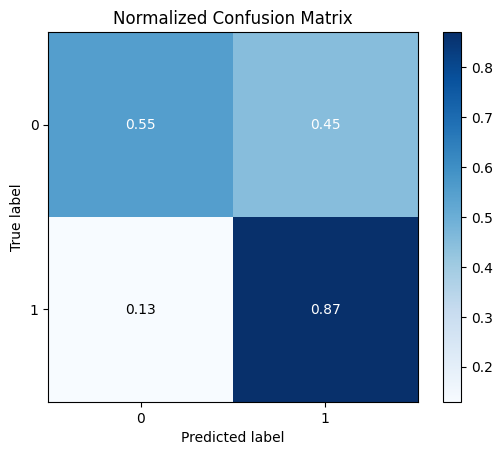

In [59]:
# plotar matriz de confusão
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

## Conclusion / Conclusão

The overall accuracy of the model may not seem very high, but in this case, that doesn't mean it is a bad model. The primary goal of the model is to predict whether a client is going to churn or not. For this specific task, the model achieves an accuracy of 87%, which is more than sufficient to identify and take action on clients who are likely to churn. This level of accuracy enables targeted interventions for those specific clients, providing valuable insights for retention strategies. Additionally, the model's accuracy can be further improved by integrating data from other departments of the company, such as marketing, customer support, and sales. By incorporating a more comprehensive set of data, the model can gain a deeper understanding of the factors influencing customer behavior, leading to even more precise predictions and effective interventions.

---

A acurácia geral do modelo pode não parecer muito alta, mas neste caso, isso não significa que o modelo seja ruim. O principal objetivo do modelo é prever se um cliente vai abandonar o serviço ou não. Para essa tarefa específica, o modelo alcança uma acurácia de 87%, o que é mais do que suficiente para identificar e tomar ações sobre clientes que provavelmente vão abandonar o serviço. Esse nível de acurácia permite intervenções direcionadas para esses clientes específicos, proporcionando insights valiosos para estratégias de retenção. Além disso, a acurácia do modelo pode ser ainda mais aprimorada ao integrar dados de outros departamentos da empresa, como marketing, atendimento ao cliente e vendas. Incorporando um conjunto mais abrangente de dados, o modelo pode obter uma compreensão mais profunda dos fatores que influenciam o comportamento dos clientes, levando a previsões ainda mais precisas e intervenções mais eficazes.
